In [1]:
# Data Processing
import pandas as pd
from PIL import Image
from examples.generator import generate_balanced_dataset, draw_shapes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from models import *
from torch.utils.data import DataLoader, Dataset

In [2]:
data, metadata = generate_balanced_dataset(100)

In [3]:
data = pd.DataFrame(data)

In [4]:
metadata = pd.DataFrame(metadata)

In [5]:
metadata

,circle_center_x,circle_center_y,circle_radius,rect_tl_x,rect_tl_y,rect_br_x,rect_br_y
0,0.312500,0.351562,0.195312,0.109375,0.703125,0.320312,0.867188
1,0.140625,0.335938,0.140625,0.523438,0.132812,0.742188,0.328125
2,0.570312,0.375000,0.117188,0.226562,0.453125,0.398438,0.820312
3,0.468750,0.242188,0.101562,0.476562,0.703125,0.664062,0.992188
4,0.757812,0.218750,0.101562,0.421875,0.453125,0.625000,0.625000
...,...,...,...,...,...,...,...
295,0.804688,0.296875,0.101562,0.648438,0.054688,0.976562,0.406250
296,0.804688,0.648438,0.101562,0.562500,0.453125,0.914062,0.757812
297,0.523438,0.304688,0.101562,0.335938,0.117188,0.679688,0.507812
298,0.242188,0.304688,0.078125,0.164062,0.117188,0.523438,0.382812


In [6]:
image_paths = [item for item in data[0]]
images = []

for path in image_paths:
    try:
        img = Image.open(path).convert('RGB')  # Convert to RGB to ensure consistency
        img = np.array(img)
        img_tensor = torch.tensor(img, dtype=torch.float32)  # Convert to PyTorch tensor
        images.append(img_tensor)
    except Exception as e:
        print(f"Error loading image {path}: {e}")

labels = torch.tensor(data[1], dtype=torch.float32)

In [7]:
class ImageDataset(Dataset):
    def __init__(self, images, labels):
        # Convert the list of images to a tensor and permute dimensions to [batch_size, channels, height, width]
        self.images = torch.stack([torch.tensor(image).permute(2, 0, 1) for image in images])
        self.labels = torch.tensor(labels).float()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        return image, label
    
batch_size = 25

# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(images,labels, test_size=0.2, random_state=42)

# Create the training dataset
train_dataset = ImageDataset(train_data, train_labels)

# Create the test dataset
test_dataset = ImageDataset(test_data, test_labels)

# Create the training dataloader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create the test dataloader
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

/var/folders/mv/_dg3pqgn2zdf7f95_1dg07rw0000gn/T/ipykernel_63583/1380037448.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.images = torch.stack([torch.tensor(image).permute(2, 0, 1) for image in images])
/var/folders/mv/_dg3pqgn2zdf7f95_1dg07rw0000gn/T/ipykernel_63583/1380037448.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels).float()


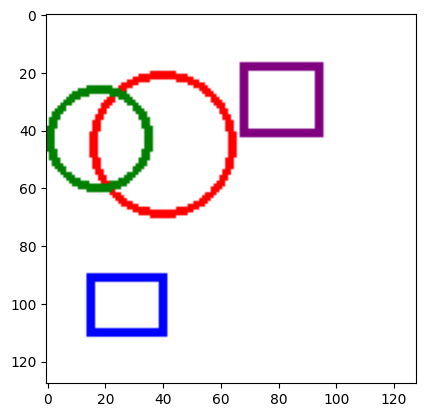

In [8]:
plt.imshow(draw_shapes(*metadata.iloc[0], *metadata.iloc[1]))

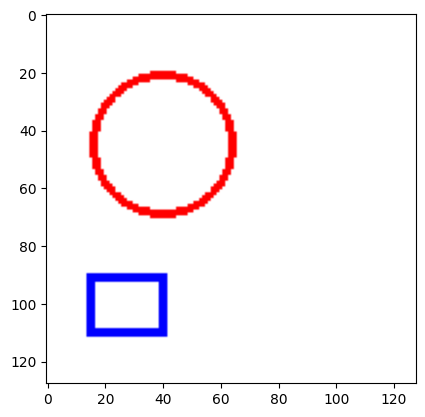

In [9]:
plt.imshow(images[0].numpy().astype(np.uint8))

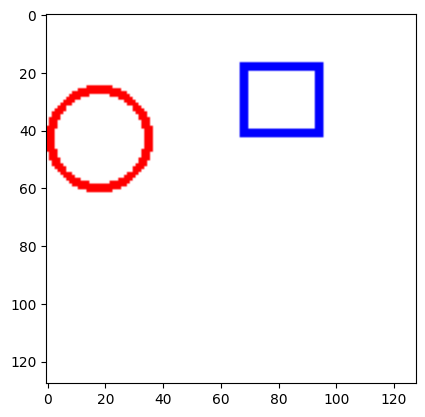

In [10]:
plt.imshow(images[1].numpy().astype(np.uint8))